In [0]:
import numpy as np
import pandas as pd

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from catboost import Pool, CatBoostClassifier

In [0]:
# ローカルファイルを直接アップロードする
#from google.colab import files
#uploaded = files.upload()

In [0]:
data = pd.read_csv('/Users/k17099kk/bigdata/keiba/keiba_data.csv')

In [10]:
data.head()

,harai,rank,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,rank_11,rank_12,rank_13,rank_14,rank_15,rank_16,rank_17,rank_18,rank_19,rank_20,rank_21,rank_22,rank_23,rank_24,rank_25,rank_26,rank_27,rank_28,rank_29,rank_30,rank_31,rank_32,rank_33,rank_34,rank_35,rank_36,rank_37,rank_38,...,rank_261,rank_262,rank_263,rank_264,rank_265,rank_266,rank_267,rank_268,rank_269,rank_270,rank_271,rank_272,rank_273,rank_274,rank_275,rank_276,rank_277,rank_278,rank_279,rank_280,rank_281,rank_282,rank_283,rank_284,rank_285,rank_286,rank_287,rank_288,rank_289,rank_290,rank_291,rank_292,rank_293,rank_294,rank_295,rank_296,rank_297,rank_298,rank_299,rank_300
0,7070,22,145,148,185,205,222,252,258,259,262,319,319.0,327.0,354.0,468.0,482.0,534.0,537.0,558.0,592.0,634.0,671.0,707.0,714.0,756.0,793.0,817.0,844.0,871.0,896.0,938.0,950.0,955.0,1000.0,1006.0,1008.0,1024.0,1040.0,1116.0,...,30464.0,30712.0,30837.0,30964.0,31220.0,31611.0,31878.0,32013.0,32992.0,33137.0,33578.0,33728.0,33728.0,33880.0,33880.0,34657.0,34816.0,34978.0,35140.0,35470.0,35638.0,35806.0,35806.0,35977.0,36149.0,36498.0,36498.0,36676.0,36676.0,36854.0,36854.0,36854.0,37402.0,37588.0,38547.0,38744.0,38744.0,39146.0,41285.0,41512.0
1,1600,4,105,115,120,160,191,198,244,274,287,292,335.0,362.0,380.0,446.0,488.0,532.0,536.0,582.0,654.0,677.0,755.0,784.0,846.0,893.0,920.0,933.0,991.0,1019.0,1044.0,1054.0,1095.0,1118.0,1179.0,1179.0,1183.0,1254.0,1285.0,1298.0,...,35885.0,36637.0,37024.0,37221.0,37621.0,37621.0,38030.0,38030.0,39093.0,39534.0,39759.0,39986.0,40684.0,40922.0,40922.0,41652.0,41902.0,41902.0,42668.0,43195.0,43463.0,43463.0,43463.0,43463.0,43735.0,44571.0,45736.0,46037.0,46342.0,46342.0,46651.0,46964.0,46964.0,46964.0,47603.0,47603.0,48594.0,48594.0,48934.0,49628.0
2,4160,11,97,127,131,139,142,215,239,364,368,411,416.0,424.0,427.0,478.0,489.0,546.0,551.0,568.0,575.0,593.0,597.0,654.0,660.0,689.0,693.0,739.0,752.0,776.0,812.0,844.0,852.0,853.0,890.0,914.0,922.0,938.0,939.0,972.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3050,9,117,120,121,143,211,286,295,300,305,305,311.0,329.0,357.0,365.0,382.0,386.0,398.0,413.0,416.0,465.0,543.0,550.0,578.0,599.0,625.0,666.0,693.0,718.0,736.0,753.0,757.0,795.0,830.0,841.0,844.0,845.0,869.0,874.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11910,37,97,131,142,188,216,224,237,327,330,336,413.0,419.0,447.0,448.0,450.0,462.0,481.0,555.0,566.0,602.0,605.0,632.0,652.0,667.0,802.0,824.0,849.0,861.0,897.0,969.0,1023.0,1046.0,1064.0,1110.0,1170.0,1186.0,1191.0,1206.0,...,40551.0,40901.0,40901.0,41802.0,42361.0,42551.0,42743.0,43132.0,43329.0,43728.0,44135.0,44759.0,44971.0,46063.0,46288.0,46515.0,46744.0,46744.0,47209.0,48167.0,49422.0,51016.0,51016.0,52137.0,52717.0,52717.0,52717.0,53011.0,53610.0,54223.0,55168.0,55491.0,56482.0,56820.0,57163.0,57509.0,58938.0,58938.0,60057.0,60057.0


In [0]:
data['manba_flag'] = data['harai'].apply(lambda x : 1 if x >= 10000 else 0)

In [12]:
data.head()

,harai,rank,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,rank_11,rank_12,rank_13,rank_14,rank_15,rank_16,rank_17,rank_18,rank_19,rank_20,rank_21,rank_22,rank_23,rank_24,rank_25,rank_26,rank_27,rank_28,rank_29,rank_30,rank_31,rank_32,rank_33,rank_34,rank_35,rank_36,rank_37,rank_38,...,rank_262,rank_263,rank_264,rank_265,rank_266,rank_267,rank_268,rank_269,rank_270,rank_271,rank_272,rank_273,rank_274,rank_275,rank_276,rank_277,rank_278,rank_279,rank_280,rank_281,rank_282,rank_283,rank_284,rank_285,rank_286,rank_287,rank_288,rank_289,rank_290,rank_291,rank_292,rank_293,rank_294,rank_295,rank_296,rank_297,rank_298,rank_299,rank_300,manba_flag
0,7070,22,145,148,185,205,222,252,258,259,262,319,319.0,327.0,354.0,468.0,482.0,534.0,537.0,558.0,592.0,634.0,671.0,707.0,714.0,756.0,793.0,817.0,844.0,871.0,896.0,938.0,950.0,955.0,1000.0,1006.0,1008.0,1024.0,1040.0,1116.0,...,30712.0,30837.0,30964.0,31220.0,31611.0,31878.0,32013.0,32992.0,33137.0,33578.0,33728.0,33728.0,33880.0,33880.0,34657.0,34816.0,34978.0,35140.0,35470.0,35638.0,35806.0,35806.0,35977.0,36149.0,36498.0,36498.0,36676.0,36676.0,36854.0,36854.0,36854.0,37402.0,37588.0,38547.0,38744.0,38744.0,39146.0,41285.0,41512.0,0
1,1600,4,105,115,120,160,191,198,244,274,287,292,335.0,362.0,380.0,446.0,488.0,532.0,536.0,582.0,654.0,677.0,755.0,784.0,846.0,893.0,920.0,933.0,991.0,1019.0,1044.0,1054.0,1095.0,1118.0,1179.0,1179.0,1183.0,1254.0,1285.0,1298.0,...,36637.0,37024.0,37221.0,37621.0,37621.0,38030.0,38030.0,39093.0,39534.0,39759.0,39986.0,40684.0,40922.0,40922.0,41652.0,41902.0,41902.0,42668.0,43195.0,43463.0,43463.0,43463.0,43463.0,43735.0,44571.0,45736.0,46037.0,46342.0,46342.0,46651.0,46964.0,46964.0,46964.0,47603.0,47603.0,48594.0,48594.0,48934.0,49628.0,0
2,4160,11,97,127,131,139,142,215,239,364,368,411,416.0,424.0,427.0,478.0,489.0,546.0,551.0,568.0,575.0,593.0,597.0,654.0,660.0,689.0,693.0,739.0,752.0,776.0,812.0,844.0,852.0,853.0,890.0,914.0,922.0,938.0,939.0,972.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3050,9,117,120,121,143,211,286,295,300,305,305,311.0,329.0,357.0,365.0,382.0,386.0,398.0,413.0,416.0,465.0,543.0,550.0,578.0,599.0,625.0,666.0,693.0,718.0,736.0,753.0,757.0,795.0,830.0,841.0,844.0,845.0,869.0,874.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11910,37,97,131,142,188,216,224,237,327,330,336,413.0,419.0,447.0,448.0,450.0,462.0,481.0,555.0,566.0,602.0,605.0,632.0,652.0,667.0,802.0,824.0,849.0,861.0,897.0,969.0,1023.0,1046.0,1064.0,1110.0,1170.0,1186.0,1191.0,1206.0,...,40901.0,40901.0,41802.0,42361.0,42551.0,42743.0,43132.0,43329.0,43728.0,44135.0,44759.0,44971.0,46063.0,46288.0,46515.0,46744.0,46744.0,47209.0,48167.0,49422.0,51016.0,51016.0,52137.0,52717.0,52717.0,52717.0,53011.0,53610.0,54223.0,55168.0,55491.0,56482.0,56820.0,57163.0,57509.0,58938.0,58938.0,60057.0,60057.0,1


In [0]:
#data.to_csv('/Users/k17099kk/bigdata/keiba/keiba_data_to_manba.csv')

In [0]:
X = data.drop(['harai', 'rank', 'manba_flag'],axis=1)
y = data['manba_flag']

In [15]:
X.head()

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,rank_11,rank_12,rank_13,rank_14,rank_15,rank_16,rank_17,rank_18,rank_19,rank_20,rank_21,rank_22,rank_23,rank_24,rank_25,rank_26,rank_27,rank_28,rank_29,rank_30,rank_31,rank_32,rank_33,rank_34,rank_35,rank_36,rank_37,rank_38,rank_39,rank_40,...,rank_261,rank_262,rank_263,rank_264,rank_265,rank_266,rank_267,rank_268,rank_269,rank_270,rank_271,rank_272,rank_273,rank_274,rank_275,rank_276,rank_277,rank_278,rank_279,rank_280,rank_281,rank_282,rank_283,rank_284,rank_285,rank_286,rank_287,rank_288,rank_289,rank_290,rank_291,rank_292,rank_293,rank_294,rank_295,rank_296,rank_297,rank_298,rank_299,rank_300
0,145,148,185,205,222,252,258,259,262,319,319.0,327.0,354.0,468.0,482.0,534.0,537.0,558.0,592.0,634.0,671.0,707.0,714.0,756.0,793.0,817.0,844.0,871.0,896.0,938.0,950.0,955.0,1000.0,1006.0,1008.0,1024.0,1040.0,1116.0,1131.0,1169.0,...,30464.0,30712.0,30837.0,30964.0,31220.0,31611.0,31878.0,32013.0,32992.0,33137.0,33578.0,33728.0,33728.0,33880.0,33880.0,34657.0,34816.0,34978.0,35140.0,35470.0,35638.0,35806.0,35806.0,35977.0,36149.0,36498.0,36498.0,36676.0,36676.0,36854.0,36854.0,36854.0,37402.0,37588.0,38547.0,38744.0,38744.0,39146.0,41285.0,41512.0
1,105,115,120,160,191,198,244,274,287,292,335.0,362.0,380.0,446.0,488.0,532.0,536.0,582.0,654.0,677.0,755.0,784.0,846.0,893.0,920.0,933.0,991.0,1019.0,1044.0,1054.0,1095.0,1118.0,1179.0,1179.0,1183.0,1254.0,1285.0,1298.0,1390.0,1464.0,...,35885.0,36637.0,37024.0,37221.0,37621.0,37621.0,38030.0,38030.0,39093.0,39534.0,39759.0,39986.0,40684.0,40922.0,40922.0,41652.0,41902.0,41902.0,42668.0,43195.0,43463.0,43463.0,43463.0,43463.0,43735.0,44571.0,45736.0,46037.0,46342.0,46342.0,46651.0,46964.0,46964.0,46964.0,47603.0,47603.0,48594.0,48594.0,48934.0,49628.0
2,97,127,131,139,142,215,239,364,368,411,416.0,424.0,427.0,478.0,489.0,546.0,551.0,568.0,575.0,593.0,597.0,654.0,660.0,689.0,693.0,739.0,752.0,776.0,812.0,844.0,852.0,853.0,890.0,914.0,922.0,938.0,939.0,972.0,984.0,996.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,117,120,121,143,211,286,295,300,305,305,311.0,329.0,357.0,365.0,382.0,386.0,398.0,413.0,416.0,465.0,543.0,550.0,578.0,599.0,625.0,666.0,693.0,718.0,736.0,753.0,757.0,795.0,830.0,841.0,844.0,845.0,869.0,874.0,886.0,892.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,97,131,142,188,216,224,237,327,330,336,413.0,419.0,447.0,448.0,450.0,462.0,481.0,555.0,566.0,602.0,605.0,632.0,652.0,667.0,802.0,824.0,849.0,861.0,897.0,969.0,1023.0,1046.0,1064.0,1110.0,1170.0,1186.0,1191.0,1206.0,1299.0,1312.0,...,40551.0,40901.0,40901.0,41802.0,42361.0,42551.0,42743.0,43132.0,43329.0,43728.0,44135.0,44759.0,44971.0,46063.0,46288.0,46515.0,46744.0,46744.0,47209.0,48167.0,49422.0,51016.0,51016.0,52137.0,52717.0,52717.0,52717.0,53011.0,53610.0,54223.0,55168.0,55491.0,56482.0,56820.0,57163.0,57509.0,58938.0,58938.0,60057.0,60057.0


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: manba_flag, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,)

In [0]:
train = pd.concat([y_train, X_train], axis=1)

In [0]:
test = pd.concat([y_test, X_test], axis=1)

# targetの割合

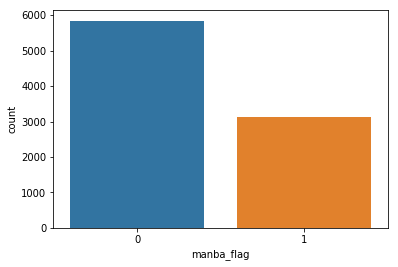

In [20]:
sns.countplot(y_train)

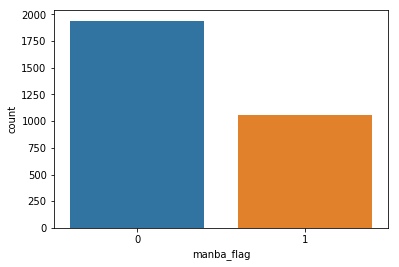

In [21]:
sns.countplot(y_test)

In [0]:
#X_train.to_csv('/Users/k17099kk/bigdata/keiba/keiba_data_to_manba.csv')

# targetに対しての相関係数

In [0]:
train_corr_matrix = train.corr().abs()
train_manba_corr = train_corr_matrix['manba_flag']
test_corr_matrix = test.corr().abs()
test_manba_corr = test_corr_matrix['manba_flag']

In [24]:
train_manba_corr[:50]

manba_flag    1.000000
rank_1        0.273444
rank_2        0.283066
rank_3        0.288062
rank_4        0.293387
rank_5        0.297163
rank_6        0.291542
rank_7        0.287804
rank_8        0.288427
rank_9        0.279913
rank_10       0.276692
rank_11       0.269279
rank_12       0.254483
rank_13       0.241599
rank_14       0.232483
rank_15       0.215933
rank_16       0.204882
rank_17       0.186616
rank_18       0.166811
rank_19       0.147138
rank_20       0.125812
rank_21       0.114677
rank_22       0.091043
rank_23       0.067831
rank_24       0.043514
rank_25       0.023153
rank_26       0.000665
rank_27       0.017599
rank_28       0.030175
rank_29       0.048940
rank_30       0.062094
rank_31       0.076654
rank_32       0.087054
rank_33       0.098829
rank_34       0.107811
rank_35       0.117379
rank_36       0.124042
rank_37       0.135846
rank_38       0.141514
rank_39       0.149107
rank_40       0.155462
rank_41       0.160119
rank_42       0.164667
rank_43    

In [25]:
train_manba_corr[50:100]

rank_50    0.179670
rank_51    0.182285
rank_52    0.184136
rank_53    0.184250
rank_54    0.181392
rank_55    0.181438
rank_56    0.179476
rank_57    0.207244
rank_58    0.208183
rank_59    0.208839
rank_60    0.209787
rank_61    0.210073
rank_62    0.212195
rank_63    0.212765
rank_64    0.213694
rank_65    0.212901
rank_66    0.213397
rank_67    0.212814
rank_68    0.211731
rank_69    0.212021
rank_70    0.209840
rank_71    0.208966
rank_72    0.208820
rank_73    0.207710
rank_74    0.206847
rank_75    0.205428
rank_76    0.203767
rank_77    0.202528
rank_78    0.202563
rank_79    0.201272
rank_80    0.200229
rank_81    0.198483
rank_82    0.195191
rank_83    0.192414
rank_84    0.187618
rank_85    0.228161
rank_86    0.228516
rank_87    0.228201
rank_88    0.227832
rank_89    0.227838
rank_90    0.227355
rank_91    0.227654
rank_92    0.226062
rank_93    0.226209
rank_94    0.226809
rank_95    0.225668
rank_96    0.225770
rank_97    0.226069
rank_98    0.225268
rank_99    0.224655


In [26]:
train_manba_corr[100:150]

rank_100    0.224047
rank_101    0.223200
rank_102    0.221843
rank_103    0.221680
rank_104    0.221255
rank_105    0.219873
rank_106    0.219845
rank_107    0.218355
rank_108    0.216941
rank_109    0.214996
rank_110    0.213376
rank_111    0.211703
rank_112    0.210228
rank_113    0.208571
rank_114    0.207281
rank_115    0.204320
rank_116    0.202517
rank_117    0.200370
rank_118    0.197666
rank_119    0.191490
rank_120    0.183123
rank_121    0.230040
rank_122    0.229929
rank_123    0.229707
rank_124    0.229475
rank_125    0.228926
rank_126    0.228376
rank_127    0.228163
rank_128    0.228227
rank_129    0.227623
rank_130    0.226713
rank_131    0.226661
rank_132    0.226003
rank_133    0.225668
rank_134    0.225030
rank_135    0.224298
rank_136    0.224121
rank_137    0.223498
rank_138    0.223095
rank_139    0.222263
rank_140    0.221772
rank_141    0.221331
rank_142    0.220793
rank_143    0.220285
rank_144    0.219446
rank_145    0.218304
rank_146    0.217386
rank_147    0

In [27]:
train_manba_corr[150:200]

rank_150    0.212335
rank_151    0.211020
rank_152    0.209970
rank_153    0.209029
rank_154    0.207640
rank_155    0.205913
rank_156    0.204364
rank_157    0.202693
rank_158    0.199618
rank_159    0.197511
rank_160    0.194503
rank_161    0.191651
rank_162    0.187910
rank_163    0.183744
rank_164    0.179350
rank_165    0.170022
rank_166    0.222959
rank_167    0.222897
rank_168    0.222641
rank_169    0.221709
rank_170    0.221253
rank_171    0.221173
rank_172    0.221042
rank_173    0.220654
rank_174    0.220116
rank_175    0.219589
rank_176    0.218698
rank_177    0.218016
rank_178    0.216863
rank_179    0.216126
rank_180    0.215311
rank_181    0.214998
rank_182    0.213934
rank_183    0.213820
rank_184    0.212935
rank_185    0.212764
rank_186    0.212183
rank_187    0.211601
rank_188    0.211146
rank_189    0.210228
rank_190    0.209730
rank_191    0.209288
rank_192    0.208888
rank_193    0.208163
rank_194    0.207080
rank_195    0.205618
rank_196    0.204515
rank_197    0

In [28]:
train_manba_corr[200:250]

rank_200    0.201721
rank_201    0.200676
rank_202    0.199930
rank_203    0.199350
rank_204    0.197993
rank_205    0.197264
rank_206    0.194816
rank_207    0.193394
rank_208    0.191293
rank_209    0.189439
rank_210    0.188067
rank_211    0.186144
rank_212    0.184402
rank_213    0.183078
rank_214    0.181553
rank_215    0.178205
rank_216    0.175267
rank_217    0.171536
rank_218    0.166910
rank_219    0.156299
rank_220    0.147409
rank_221    0.225250
rank_222    0.225034
rank_223    0.225069
rank_224    0.224717
rank_225    0.224268
rank_226    0.223883
rank_227    0.222741
rank_228    0.222762
rank_229    0.222113
rank_230    0.222163
rank_231    0.221146
rank_232    0.220998
rank_233    0.220579
rank_234    0.220283
rank_235    0.219494
rank_236    0.218598
rank_237    0.218674
rank_238    0.218131
rank_239    0.217514
rank_240    0.216830
rank_241    0.216176
rank_242    0.215857
rank_243    0.214984
rank_244    0.213828
rank_245    0.213605
rank_246    0.212321
rank_247    0

In [29]:
train_manba_corr[250:300]

rank_250    0.208845
rank_251    0.208073
rank_252    0.207284
rank_253    0.206451
rank_254    0.205672
rank_255    0.204910
rank_256    0.204153
rank_257    0.203117
rank_258    0.201239
rank_259    0.200288
rank_260    0.199472
rank_261    0.198568
rank_262    0.197120
rank_263    0.196062
rank_264    0.194734
rank_265    0.193134
rank_266    0.191338
rank_267    0.190067
rank_268    0.188452
rank_269    0.187098
rank_270    0.185731
rank_271    0.184349
rank_272    0.181958
rank_273    0.180776
rank_274    0.178963
rank_275    0.176430
rank_276    0.173996
rank_277    0.171125
rank_278    0.167809
rank_279    0.165034
rank_280    0.161711
rank_281    0.157331
rank_282    0.153497
rank_283    0.145863
rank_284    0.141344
rank_285    0.131797
rank_286    0.114882
rank_287    0.237477
rank_288    0.236461
rank_289    0.236283
rank_290    0.236070
rank_291    0.236111
rank_292    0.235698
rank_293    0.235262
rank_294    0.234703
rank_295    0.234858
rank_296    0.234408
rank_297    0

相関係数をソート

In [30]:
train_manba_corr_sorted = train_manba_corr.sort_values(ascending=False)
train_manba_corr_sorted

manba_flag    1.000000
rank_5        0.297163
rank_4        0.293387
rank_6        0.291542
rank_8        0.288427
rank_3        0.288062
rank_7        0.287804
rank_2        0.283066
rank_9        0.279913
rank_10       0.276692
rank_1        0.273444
rank_11       0.269279
rank_12       0.254483
rank_13       0.241599
rank_287      0.237477
rank_288      0.236461
rank_289      0.236283
rank_291      0.236111
rank_290      0.236070
rank_292      0.235698
rank_293      0.235262
rank_295      0.234858
rank_294      0.234703
rank_296      0.234408
rank_297      0.233946
rank_299      0.233307
rank_298      0.233256
rank_300      0.232665
rank_14       0.232483
rank_121      0.230040
                ...   
rank_281      0.157331
rank_219      0.156299
rank_40       0.155462
rank_282      0.153497
rank_39       0.149107
rank_220      0.147409
rank_19       0.147138
rank_283      0.145863
rank_38       0.141514
rank_284      0.141344
rank_37       0.135846
rank_285      0.131797
rank_20    

In [31]:
test_manba_corr_sorted = test_manba_corr.sort_values(ascending=False)
test_manba_corr_sorted

manba_flag    1.000000
rank_4        0.297013
rank_3        0.293526
rank_6        0.291810
rank_5        0.291004
rank_2        0.286975
rank_7        0.285433
rank_9        0.283848
rank_8        0.281440
rank_1        0.277768
rank_10       0.275013
rank_11       0.266491
rank_12       0.249510
rank_13       0.244470
rank_166      0.233378
rank_167      0.232945
rank_169      0.232907
rank_168      0.232862
rank_170      0.231959
rank_121      0.230958
rank_171      0.230954
rank_85       0.230680
rank_173      0.230481
rank_172      0.230393
rank_14       0.230367
rank_174      0.230336
rank_122      0.230218
rank_123      0.229810
rank_175      0.229786
rank_124      0.229238
                ...   
rank_280      0.159469
rank_281      0.158527
rank_282      0.156859
rank_39       0.156755
rank_283      0.150673
rank_38       0.150265
rank_220      0.149081
rank_18       0.147957
rank_284      0.146761
rank_37       0.145052
rank_35       0.141466
rank_36       0.140498
rank_285   

# 基本情報

In [32]:
train.shape

(8977, 301)

In [33]:
train.dtypes

manba_flag      int64
rank_1          int64
rank_2          int64
rank_3          int64
rank_4          int64
rank_5          int64
rank_6          int64
rank_7          int64
rank_8          int64
rank_9          int64
rank_10         int64
rank_11       float64
rank_12       float64
rank_13       float64
rank_14       float64
rank_15       float64
rank_16       float64
rank_17       float64
rank_18       float64
rank_19       float64
rank_20       float64
rank_21       float64
rank_22       float64
rank_23       float64
rank_24       float64
rank_25       float64
rank_26       float64
rank_27       float64
rank_28       float64
rank_29       float64
               ...   
rank_271      float64
rank_272      float64
rank_273      float64
rank_274      float64
rank_275      float64
rank_276      float64
rank_277      float64
rank_278      float64
rank_279      float64
rank_280      float64
rank_281      float64
rank_282      float64
rank_283      float64
rank_284      float64
rank_285  

In [34]:
train.isnull().sum()

manba_flag       0
rank_1           0
rank_2           0
rank_3           0
rank_4           0
rank_5           0
rank_6           0
rank_7           0
rank_8           0
rank_9           0
rank_10          0
rank_11          1
rank_12          1
rank_13          1
rank_14          1
rank_15          1
rank_16          1
rank_17          1
rank_18          1
rank_19          1
rank_20          1
rank_21         18
rank_22         18
rank_23         18
rank_24         18
rank_25         18
rank_26         18
rank_27         18
rank_28         18
rank_29         18
              ... 
rank_271      2050
rank_272      2050
rank_273      2050
rank_274      2050
rank_275      2050
rank_276      2050
rank_277      2050
rank_278      2050
rank_279      2050
rank_280      2050
rank_281      2050
rank_282      2050
rank_283      2050
rank_284      2050
rank_285      2050
rank_286      2050
rank_287      2715
rank_288      2715
rank_289      2715
rank_290      2715
rank_291      2715
rank_292    

In [35]:
X_train.describe()

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,rank_11,rank_12,rank_13,rank_14,rank_15,rank_16,rank_17,rank_18,rank_19,rank_20,rank_21,rank_22,rank_23,rank_24,rank_25,rank_26,rank_27,rank_28,rank_29,rank_30,rank_31,rank_32,rank_33,rank_34,rank_35,rank_36,rank_37,rank_38,rank_39,rank_40,...,rank_261,rank_262,rank_263,rank_264,rank_265,rank_266,rank_267,rank_268,rank_269,rank_270,rank_271,rank_272,rank_273,rank_274,rank_275,rank_276,rank_277,rank_278,rank_279,rank_280,rank_281,rank_282,rank_283,rank_284,rank_285,rank_286,rank_287,rank_288,rank_289,rank_290,rank_291,rank_292,rank_293,rank_294,rank_295,rank_296,rank_297,rank_298,rank_299,rank_300
count,8977.000000,8977.000000,8977.000000,8977.000000,8977.000000,8977.000000,8977.000000,8977.000000,8977.000000,8977.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8959.000000,8915.000000,8915.000000,8915.000000,8915.000000,8915.000000,...,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.00000,6927.000000,6927.000000,6927.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000
mean,122.699677,159.777208,185.642754,217.045227,245.552635,273.157291,300.461290,326.908990,352.329397,378.337641,407.384470,434.250446,461.624332,489.261475,516.840575,545.483957,574.376560,603.712455,633.782643,663.925579,694.365443,725.733229,757.757562,790.478960,823.020873,856.521152,891.371135,925.822078,961.205268,997.392343,1034.365889,1071.983145,1109.899766,1148.124121,1187.807233,1220.886708,1262.100617,1304.237577,1346.794504,1389.120471,...,32421.504403,32815.356720,33244.865021,33680.104085,34095.447091,34551.294933,35016.806554,35474.162552,35967.916991,36458.411867,36978.506424,37494.447380,38037.838025,38586.216977,39216.416342,39847.071893,40517.263606,41226.282806,42012.220297,42807.974303,43710.271257,44657.926664,45889.09961,47271.522593,49389.284972,52833.537751,35187.357873,35519.527467,35864.854839,36197.092303,36531.824018,36867.968700,37214.674864,37558.458639,37916.035931,38271.707761,38625.008304,38994.576014,39371.389013,39743.795273
std,61.901585,68.628822,72.428216,75.533514,79.072792,81.198575,82.927454,84.322312,85.788844,87.221021,88.235134,89.734794,90.854244,92.125864,93.509812,95.074766,97.008815,100.355260,103.408784,107.747933,110.318930,116.018207,124.426387,132.122357,142.963248,153.431725,165.949797,176.072472,189.988296,206.040235,223.458574,241.584470,260.305075,278.901929,300.856381,294.424677,315.524040,339.488256,363.955530,388.031690,...,24765.220429,25290.276606,25861.550252,26534.079668,27058.651262,27784.831082,28462.566877,29151.591651,29902.529199,30651.879000,31499.289933,32337.957733,33239.580239,34122.313153,35441.287188,36669.796177,38019.294186,39489.255596,41265.797285,43074.833973,45167.969304,47549.569850,51208.68775,55000.305965,62736.766685,76401.759670,20453.732643,20687.319718,20935.509936,21186.504071,21416.242282,21644.528085,21882.510317,22144.131123,22417.928271,22693.612870,22948.007499,23262.532171,23541.770984,23801.259284
min,14.000000,30.000000,35.000000,62.000000,74.000000,81.000000,123.000000,128.000000,147.000000,160.000000,183.000000,188.000000,212.000000,236.000000,254.000000,258.000000,270.000000,277.000000,283.000000,305.000000,379.000000,388.000000,409.000000,429.000000,455.000000,481.000000,497.000000,497.000000,510.000000,531.000000,535.000000,543.000000,563.000000,569.000000,575.000000,630.000000,638.000000,659.000000,697.000000,

In [36]:
X_test.describe()

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,rank_7,rank_8,rank_9,rank_10,rank_11,rank_12,rank_13,rank_14,rank_15,rank_16,rank_17,rank_18,rank_19,rank_20,rank_21,rank_22,rank_23,rank_24,rank_25,rank_26,rank_27,rank_28,rank_29,rank_30,rank_31,rank_32,rank_33,rank_34,rank_35,rank_36,rank_37,rank_38,rank_39,rank_40,...,rank_261,rank_262,rank_263,rank_264,rank_265,rank_266,rank_267,rank_268,rank_269,rank_270,rank_271,rank_272,rank_273,rank_274,rank_275,rank_276,rank_277,rank_278,rank_279,rank_280,rank_281,rank_282,rank_283,rank_284,rank_285,rank_286,rank_287,rank_288,rank_289,rank_290,rank_291,rank_292,rank_293,rank_294,rank_295,rank_296,rank_297,rank_298,rank_299,rank_300
count,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000,2962.000000,2962.000000,2962.000000,2962.000000,2962.000000,...,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000
mean,122.311059,160.463081,186.472436,216.872703,245.521216,271.857668,300.079853,327.260942,352.859673,379.223856,408.074247,434.770234,462.207692,489.766890,517.375920,545.584950,575.723411,605.089967,633.969565,663.188294,693.818486,725.857669,757.729069,790.849632,824.019759,858.046885,892.588413,926.581045,963.296048,1000.625251,1036.917281,1074.735767,1112.498995,1152.375084,1191.600134,1217.613774,1257.579676,1300.431803,1344.014180,1387.059419,...,33411.142174,33839.188261,34288.848696,34736.993478,35205.749565,35710.523478,36185.627391,36660.648696,37125.376957,37634.214348,38155.286522,38660.943478,39244.009130,39851.306522,40492.436957,41112.482174,41730.861739,42496.475217,43302.694348,44166.932609,45010.746522,46104.396087,47338.879565,48636.379565,50781.492609,54338.762174,35608.838100,35948.028114,36277.731944,36612.980126,36967.767814,37334.148328,37688.702860,38032.564712,38383.013572,38738.938924,39097.921958,39476.426563,39856.019389,40216.602036
std,62.678178,69.711169,73.574783,76.220279,78.802109,80.873910,82.450228,84.593083,86.590910,88.000019,88.935904,89.967979,91.726323,92.411437,94.814943,96.415527,99.781921,104.217765,109.437539,113.984719,117.501097,125.437935,131.954873,141.307595,150.033542,161.907931,177.316289,189.708989,206.842986,224.573463,242.040457,266.874764,287.185184,308.716982,324.513200,296.532762,320.857727,349.029938,381.016871,409.292167,...,26597.901398,27136.987448,27784.558103,28440.561790,29152.018797,29951.910964,30637.583908,31369.462835,31913.040169,32703.996803,33481.761122,34266.110210,35196.869559,36250.346566,37250.139000,38299.146691,39368.811918,41014.461932,42813.230057,44527.290495,46406.259168,49317.042199,52364.749953,55381.494034,62519.250515,75052.938572,21621.073196,21921.717673,22149.179572,22392.526074,22707.551681,22977.281971,23230.941099,23468.103573,23749.724925,24009.667898,24268.216017,24562.807230,24884.936330,25120.011341
min,16.000000,29.000000,37.000000,59.000000,86.000000,93.000000,123.000000,142.000000,161.000000,166.000000,210.000000,230.000000,248.000000,250.000000,273.000000,309.000000,310.000000,330.000000,345.000000,348.000000,395.000000,397.000000,426.000000,441.000000,442.000000,473.000000,497.000000,518.000000,536.000000,552.000000,584.000000,598.000000,609.000000,617.000000,621.000000,653.000000,671.000000,683.000000,747.000

In [0]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 432x288 with 0 Axes>

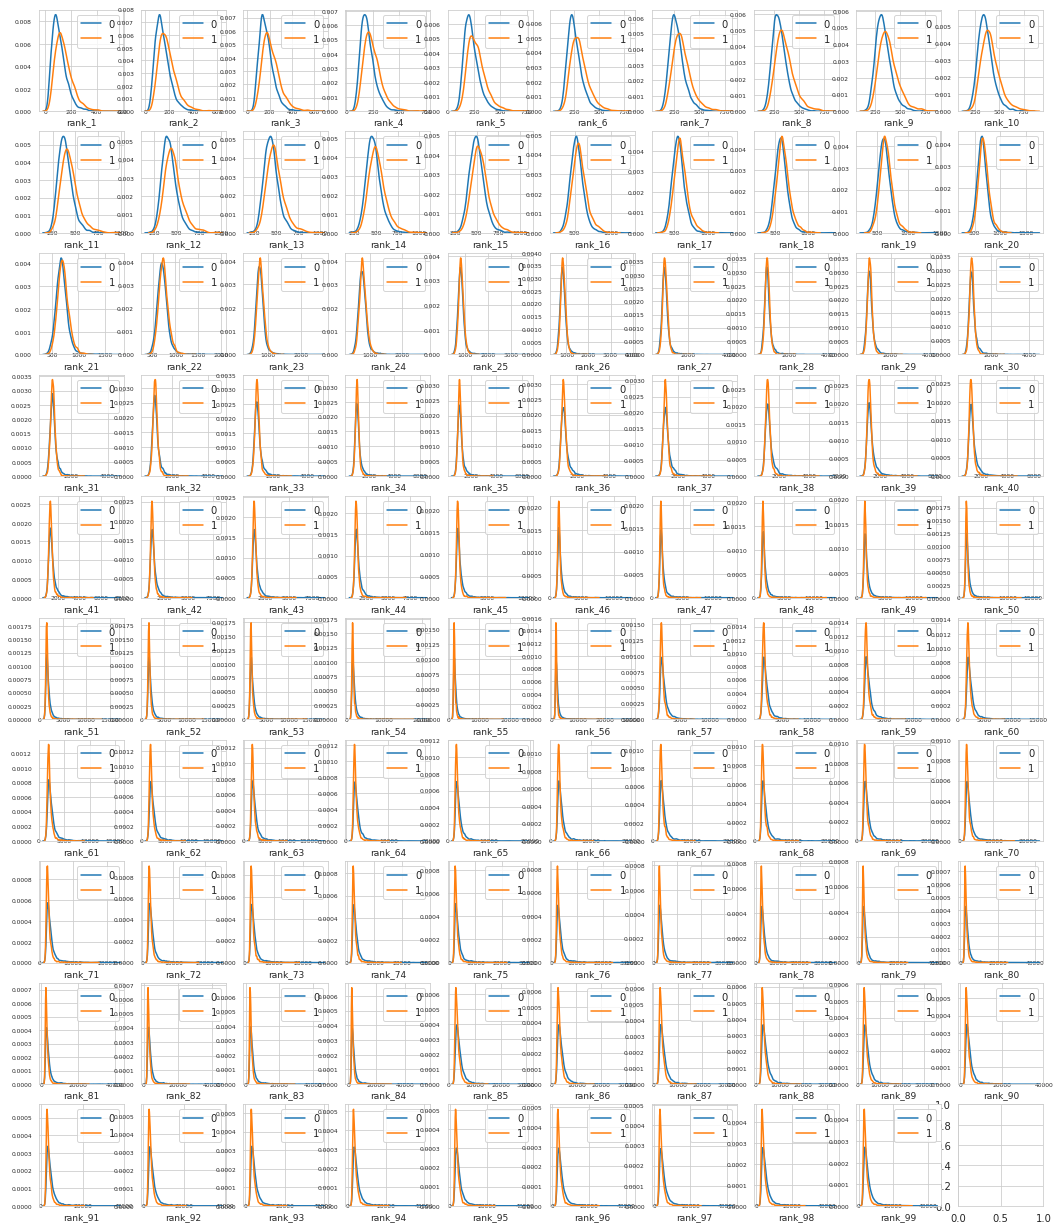

In [38]:
t0 = train.loc[train['manba_flag'] == 0]
t1 = train.loc[train['manba_flag'] == 1]
features = train.columns.values[1:100]
plot_feature_distribution(t0, t1, '0', '1', features)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 432x288 with 0 Axes>

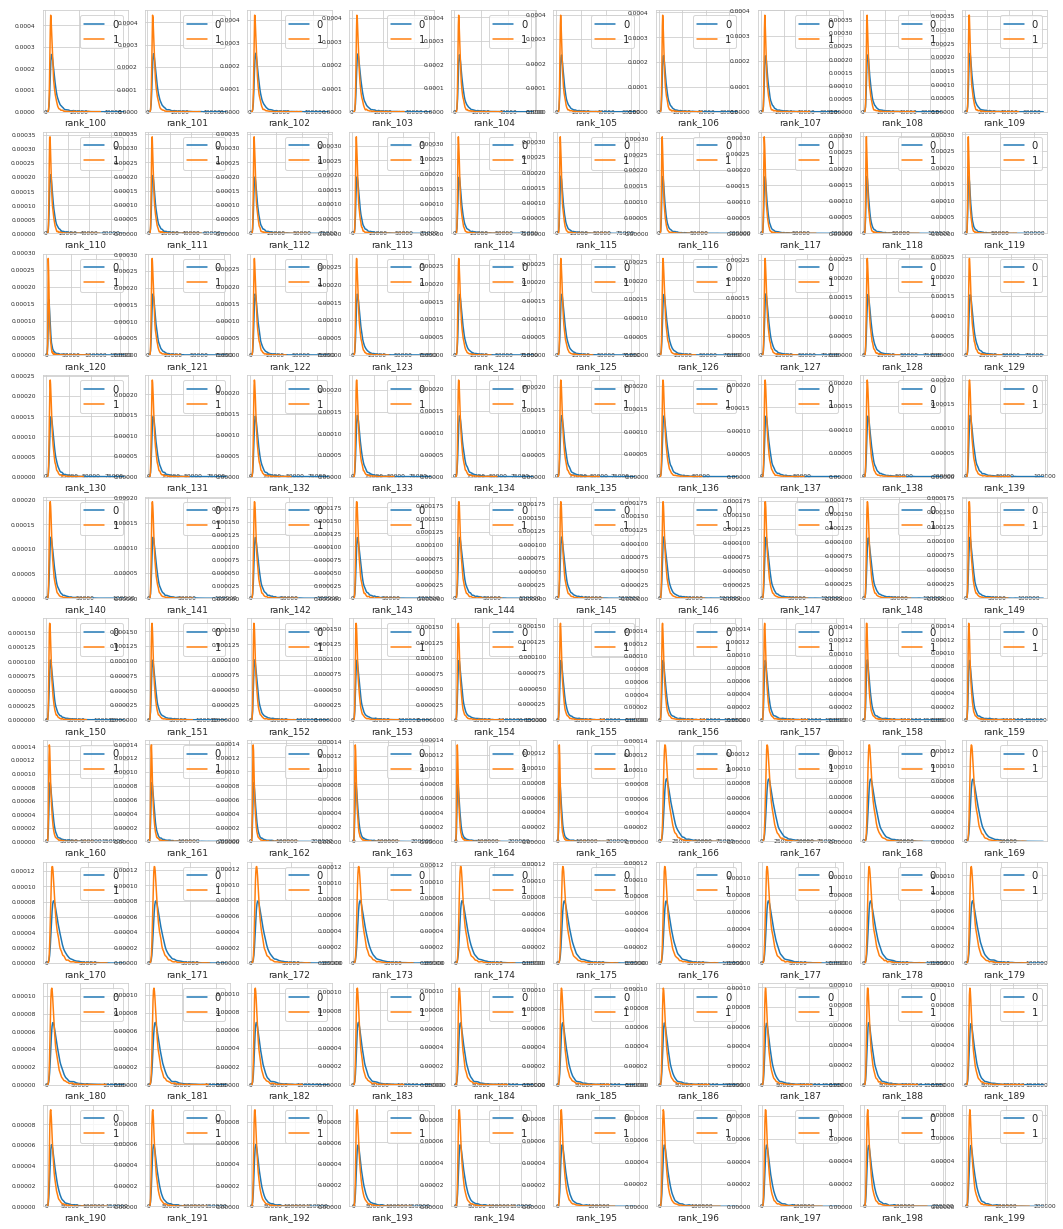

In [39]:
t0 = train.loc[train['manba_flag'] == 0]
t1 = train.loc[train['manba_flag'] == 1]
features = train.columns.values[100:200]
plot_feature_distribution(t0, t1, '0', '1', features)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 432x288 with 0 Axes>

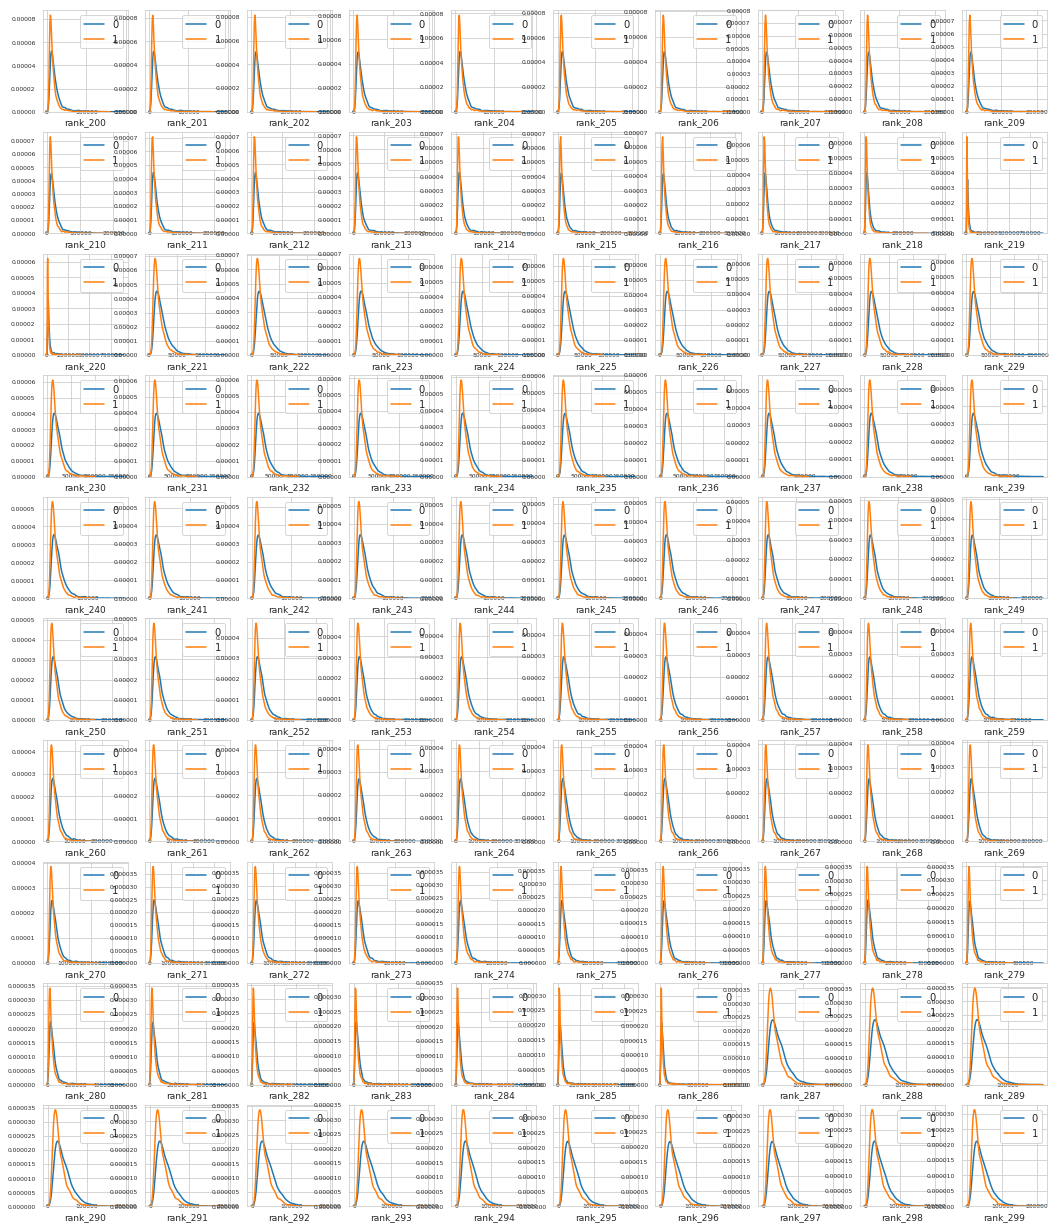

In [40]:
t0 = train.loc[train['manba_flag'] == 0]
t1 = train.loc[train['manba_flag'] == 1]
features = train.columns.values[200:300]
plot_feature_distribution(t0, t1, '0', '1', features)

In [0]:
model = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    task_type="GPU",
    l2_leaf_reg=50,
    use_best_model="True",
    od_type="Iter",
    learning_rate=0.03,
    iterations=70000,
    random_seed=42,
    depth=6,
    early_stopping_rounds=15000,
    border_count=64
)

In [0]:
n_split = 5
kf = KFold(n_splits=n_split, random_state=42, shuffle=True)

In [0]:
train = X_train
target = y_train

In [0]:
y_valid_pred = 0 * target
y_test_pred = 0

In [0]:
for idx, (train_index, valid_index) in enumerate(kf.split(train)):
    y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
    X_train, X_valid = train.iloc[train_index,:], train.iloc[valid_index,:]
    _train = Pool(X_train, label=y_train)
    _valid = Pool(X_valid, label=y_valid)
    print( "\nFold ", idx)
    fit_model = model.fit(_train,
                          eval_set=_valid,
                          use_best_model=True,
                          verbose=5000,
                          plot=True
                         )
    pred = fit_model.predict_proba(X_valid)[:,1]
    print( "  auc = ", roc_auc_score(y_valid, pred) )
    y_valid_pred.iloc[valid_index] = pred
    y_test_pred += fit_model.predict_proba(test)[:,1]
y_test_pred /= n_split


Fold  0


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6951093	test: 0.6945982	best: 0.6945982 (0)	total: 94.1ms	remaining: 1h 49m 46s
